# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [141]:
import pandas as pd
import numpy as np

### levar algumas coisas em considerações 
#### dataframe de uma unica coluna df[["Sex"]] - Series de uma unica coluna df["Sex"]
#### -------------------------------------------------------------------------------------------------------------------
#### transpose = valores vire coluna - df[["Sex"]].transpose()
#### -------------------------------------------------------------------------------------------------------------------
#### desloca um valor para baixo, para quando a gente quiser fazer diferente de anos de duas séries df[["Year"]].shift(1) 
#### -------------------------------------------------------------------------------------------------------------------
#### qual dos valores estão dentro dessa lista df["year"].isin([1900,1901,1075])
#### -------------------------------------------------------------------------------------------------------------------
#### values retorna a series em formato de array
#### -------------------------------------------------------------------------------------------------------------------
#### iterrows - for idx, row in df(): print(idx, row) break
#### -------------------------------------------------------------------------------------------------------------------
#### to dict  df("index").to_dict()


## Perguntas - Obesity among adults by country, 1975-2016

In [142]:
df_obesity = pd.read_csv("obesity_cleaned.csv")
df_obesity.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade que são os valores antes do colchete da coluna Obesity (%). Transforme em float as colunas que porventura foram importadas como string.

In [143]:
del df_obesity["Unnamed: 0"]
df_obesity[["Obesity"]] = df_obesity[["Obesity (%)"]]
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: x.split(" ")[0])

In [144]:
df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan
df_obesity.dropna(inplace=True)

In [145]:
df_obesity['Year'] = df_obesity['Year'].astype(float)
df_obesity['Obesity'] = df_obesity['Obesity'].astype(float)

In [146]:
df_obesity.head()

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975.0,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975.0,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975.0,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976.0,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976.0,0.2 [0.0-0.7],Male,0.2


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [147]:
filtro = df_obesity[(df_obesity["Year"]==2015)]
media = filtro.groupby("Sex").mean("Obesity") 
media

,Year,Obesity
Sex,,
Both sexes,2015.0,19.508377
Female,2015.0,22.899476
Male,2015.0,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [148]:
min_year = df_obesity[(df_obesity["Year"]==1975) & (df_obesity["Sex"]=='Both sexes')] [["Year","Country","Obesity"]]
max_year = df_obesity[(df_obesity["Year"]==2016) & (df_obesity["Sex"]=='Both sexes')] [["Year","Country","Obesity"]]
                      
join = pd.merge(min_year, max_year, how="inner", on=['Country','Country'])

join["var"] = join["Obesity_x"] - join["Obesity_y"]

In [149]:
# menores taxas de aumento
join.sort_values(by='var', ascending=False).head(5)

,Year_x,Country,Obesity_x,Year_y,Obesity_y,var
187,1975.0,Viet Nam,0.1,2016.0,2.1,-2.0
154,1975.0,Singapore,3.0,2016.0,6.1,-3.1
86,1975.0,Japan,1.0,2016.0,4.3,-3.3
13,1975.0,Bangladesh,0.2,2016.0,3.6,-3.4
169,1975.0,Timor-Leste,0.2,2016.0,3.8,-3.6


In [150]:
# maiores taxas de aumento
join.sort_values(by='var').head(5)

,Year_x,Country,Obesity_x,Year_y,Obesity_y,var
176,1975.0,Tuvalu,17.9,2016.0,51.6,-33.7
125,1975.0,Niue,18.9,2016.0,50.0,-31.1
90,1975.0,Kiribati,15.9,2016.0,46.0,-30.1
171,1975.0,Tonga,19.9,2016.0,48.2,-28.3
39,1975.0,Cook Islands,28.0,2016.0,55.9,-27.9


- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [151]:
filtro = df_obesity[(df_obesity["Year"]==2015) & (df_obesity["Sex"]=='Both sexes')] [["Country","Obesity"]]
filtro.sort_values(by='Obesity').dropna()

,Country,Obesity
24186,Viet Nam,2.0
1758,Bangladesh,3.4
21918,Timor-Leste,3.6
9948,India,3.7
3774,Cambodia,3.7
...,...,...
22800,Tuvalu,50.9
13602,Marshall Islands,52.4
16500,Palau,54.8
5034,Cook Islands,55.4


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [152]:
filtro_br = df_obesity[(df_obesity["Country"] == 'Brazil')]
filtro_br.groupby("Sex")[["Obesity"]].mean()

,Obesity
Sex,
Both sexes,12.883333
Female,15.850000
Male,9.671429


- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

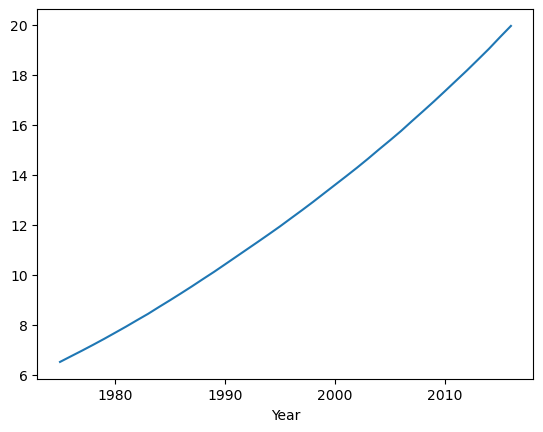

In [153]:
import matplotlib.pyplot as plt

ambos_sexos = df_obesity[(df_obesity["Sex"]=='Both sexes')][["Year","Sex","Obesity"]]
agrupado = ambos_sexos.groupby("Year")["Obesity"].mean()

agrupado.plot()

## Perguntas - GDP Per Person (1901-2011)

In [154]:
df_gdp = pd.read_csv("GDP.csv", decimal=".")
df_gdp.head()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [155]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [156]:
#ano
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [157]:
#gdp_pp
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",","")))
df_gdp

,Country,Region,Year,GDP_pp,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40
...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,520.17


- Você conseguiria informar o primeiro valor registrado de cada país?

In [158]:
df_gdp.groupby("Country").min("Year").head()

,Year,gdp_pp
Country,,
Afghanistan,1901,595.04
Albania,1901,1062.01
Algeria,1901,1807.76
Andorra,1901,3352.50
Angola,1901,525.76


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [159]:
df_gdp_filter = df_gdp[(df_gdp["Year"] >= 1901) & (df_gdp["Year"] <= 2001)]
df_gdp_filter.groupby("Region")
df_gdp_filter.sort_values(by="gdp_pp", ascending=False)

,Country,Region,Year,GDP_pp,gdp_pp
2040,Kuwait,"Middle East, North Africa, and Greater Arabia",1956,"118,681.30",118681.30
2043,Kuwait,"Middle East, North Africa, and Greater Arabia",1971,"111,654.83",111654.83
2039,Kuwait,"Middle East, North Africa, and Greater Arabia",1951,"107,493.38",107493.38
2041,Kuwait,"Middle East, North Africa, and Greater Arabia",1961,"94,263.18",94263.18
2042,Kuwait,"Middle East, North Africa, and Greater Arabia",1966,"86,817.71",86817.71
...,...,...,...,...,...
2154,Lesotho,Sub-Saharan Africa,1951,294.60,294.60
2150,Lesotho,Sub-Saharan Africa,1931,293.56,293.56
2151,Lesotho,Sub-Saharan Africa,1936,290.73,290.73
2152,Lesotho,Sub-Saharan Africa,1941,287.93,287.93


- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [160]:
arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_year, columns=["Year"])
df_all_years.index = df_all_years["Year"]


#ele vai pegar e trazer como true e false os anos que estão presente no dataframe eo tiô no inicio depois do igual inverte a logica de true pora false e vice versa
#Então ele vai retornar true apenas os valores que a gente não quer ou seja que estão em falta
df_year_off = ~df_all_years["Year"].isin(df_gdp["Year"])
df_year_off = df_all_years.loc[df_year_off].index

In [161]:
df_year_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [162]:
df_gdp = df_gdp.sort_values(["Country","Year"])

df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [163]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [164]:
df_gdp.head(5)

,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40,3.094,1926.0


In [165]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue
    
    years_to_add = df_year_off[(df_year_off < row["next_year"]) & (df_year_off > row["Year"])]
    
    for new_year in years_to_add:
        #importante passar uma copia(.copy) da row pra não dar ruim no dataframe
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = new_year
        add_row["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [166]:
df_new_data

,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,613.99,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,613.99,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,613.99,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,613.99,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,624.04,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,719.96,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,520.17,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,520.17,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,520.17,523.866,1.232,2011.0,estimated


In [167]:
df_gdp_final = pd.concat([df_gdp, df_new_data])

In [168]:
df_gdp_final.sort_values(["Country","Year"],inplace=True) 

In [169]:
df_gdp_final.index = df_gdp_final["Year"]

In [171]:
df_gdp_final["kind"].fillna("real", inplace=True)
df_gdp_final

,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,613.99,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,613.99,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,613.99,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,613.99,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,520.17,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,520.17,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,520.17,523.866,1.232,2011.0,estimated


In [172]:
#fig, ax = plt.subplots(figsize=(20,5))

#df_gdp_final = df_gdp_final[(df_gdp_final["kind"] == "real") & (df_gdp_final["Country"] == "Brazil")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
#df_gdp_final = df_gdp_final[(df_gdp_final["kind"] == "estimated") & (df_gdp_final["Country"] == "Brazil")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="orange")


### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [173]:
df_gdp_final["Year"] = df_gdp_final["Year"].astype(int)
df_gdp_final["gdp_pp"] = df_gdp_final["gdp_pp"].astype(float)

In [174]:
import plotly.express as px

df = px.data.gapminder()
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]

#compreensão em dicionario
dict_num = {j: i for i, j in enumerate(df_gdp["Country"].unique())}

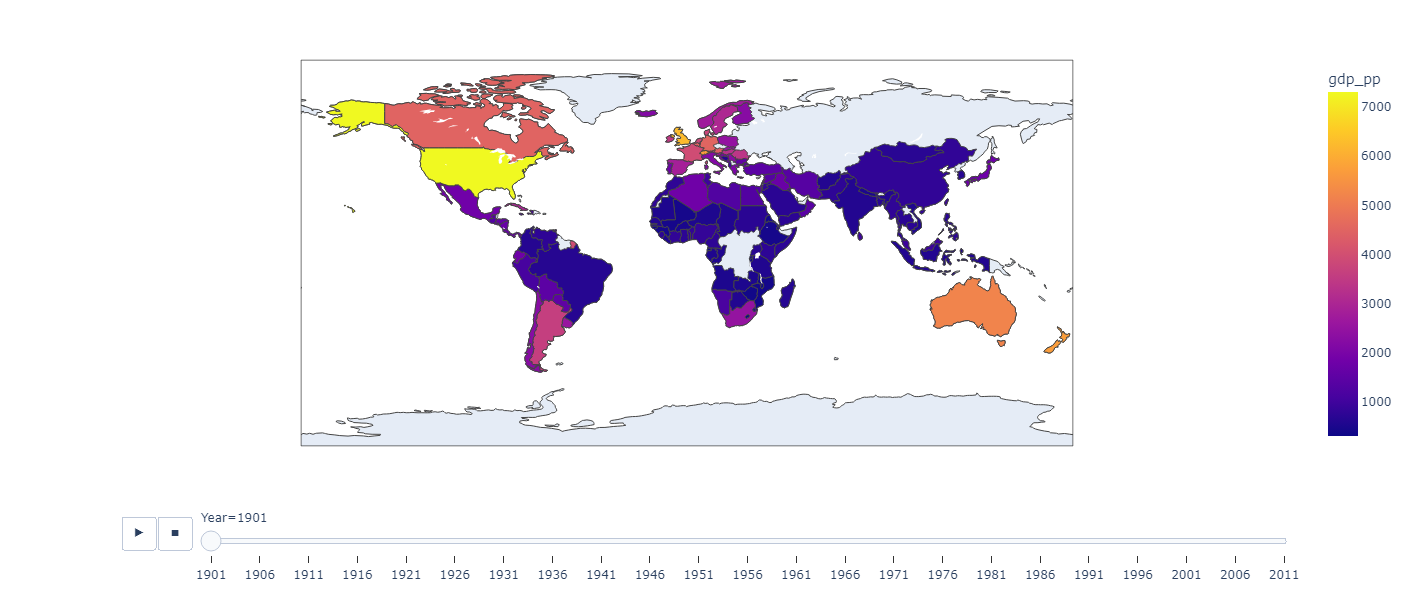

In [175]:
df_gdp_final["iso_alpha"] = df_gdp_final["Country"].map(dict_iso_alpha)
df_gdp_final["iso_num"] = df_gdp_final["Country"].map(dict_num)

fig = px.choropleth(df_gdp_final[df_gdp_final["kind"] == "real"].reset_index(drop=True), locations="iso_alpha",color="gdp_pp",hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)

fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [179]:
df_obesity["country-year"] = df_obesity["Country"] + "-" + df_obesity.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index("country-year").to_dict()["Obesity"]

In [180]:
df_gdp_final["country-year"] = df_gdp_final["Country"] + "-" + df_gdp_final["Year"].apply(lambda x: str(int(x))).values

In [181]:
df_gdp_final["obesity"] = df_gdp_final["country-year"].map(dict_obesity_year)
df_gdp_final

,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,obesity
Year,,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.990,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,613.99,616.000,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,613.99,618.010,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,613.99,620.020,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,613.99,622.030,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,520.17,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,520.17,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7
2009,Zimbabwe,Sub-Saharan Africa,2009,520.17,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009,22.2


In [189]:
df_gdp_clean = df_gdp_final.dropna()
df_gdp_clean.head()

,Country,Region,Year,GDP_pp,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,obesity
Year,,,,,,,,,,,,
1975,Afghanistan,"Middle East, North Africa, and Greater Arabia",1975,773.70,847.692,18.498,1976.0,estimated,AFG,0,Afghanistan-1975,0.8
1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.19,866.190,6.134,1981.0,real,AFG,0,Afghanistan-1976,0.8
1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",1977,866.19,872.324,6.134,1981.0,estimated,AFG,0,Afghanistan-1977,0.9
1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",1978,866.19,878.458,6.134,1981.0,estimated,AFG,0,Afghanistan-1978,0.9
1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",1979,866.19,884.592,6.134,1981.0,estimated,AFG,0,Afghanistan-1979,1.0


In [192]:
#corr  = como duas variaveis correlacionam em relação ao tempo
df_gdp_clean.reset_index(drop=True).groupby("Year")[["obesity","gdp_pp"]].mean().corr()

,obesity,gdp_pp
obesity,1.000000,0.969378
gdp_pp,0.969378,1.000000
